In [1]:
from f_train import *

### load data

In [2]:
raw_data = np.loadtxt('../dmel_data.txt').T  # transpose the data so that the shape is 6078 cells x (3+6*99) columns
gene_exp = np.copy(raw_data[:,3:])  # excluding (x,y,z) coordinates)
n_cell = gene_exp.shape[0]  # number of cells
print("# of cells: ", n_cell)
train_cell_ind = np.random.choice(range(n_cell), size = int(n_cell/2), replace=False)
test_cell_ind = [ i for i in range(n_cell) if i not in set(list(train_cell_ind))]

tr_data = np.vstack([gene_exp[train_cell_ind, i::6] for i in range(6)]) #(3039 cells * 6 timepoints) x 99 genes
te_data = np.vstack([gene_exp[test_cell_ind, i::6] for i in range(6)])  #(3039 cells * 6 timepoints) x 99 genes

complete_all = ([int(x) - 1 for x in open('../indices_complete.txt','r').readline().split()])
comp_ind = list(map(int, list((np.array(complete_all)[::6]-3)/6)))

# of cells:  6078


In [3]:
gene_sel = np.random.choice(comp_ind, 3, replace=False)
print("selected genes: ", gene_sel)
mt_list=[]
tp_list=[]
save_tr=[]
save_te=[]
for i in range(len(gene_sel)):
    mt = np.random.randint(1, 6, 1)
    mt_list.append(mt)
    tp = np.random.choice(range(1,7), mt, replace=False)
    tp_list.append(tp)
    print("# of missing time points: ", mt, " which time point is missing: ", tp)
    for j in tp:
        save_tr.append(np.copy(tr_data[(3039*(j-1)):(3039*j), gene_sel[i]]))
        save_te.append(np.copy(te_data[(3039*(j-1)):(3039*j), gene_sel[i]]))
        tr_data[(3039*(j-1)):(3039*j), gene_sel[i]] = 0
        te_data[(3039*(j-1)):(3039*j), gene_sel[i]] = 0

selected genes:  [95 66 54]
# of missing time points:  [4]  which time point is missing:  [5 6 2 1]
# of missing time points:  [2]  which time point is missing:  [6 2]
# of missing time points:  [1]  which time point is missing:  [4]


In [4]:
print(comp_ind)
comp_ind=[i for i in comp_ind if i not in gene_sel]
print(comp_ind)

[20, 29, 35, 42, 47, 54, 56, 57, 59, 60, 61, 62, 66, 67, 74, 77, 79, 82, 83, 84, 89, 91, 93, 94, 95, 97, 98]
[20, 29, 35, 42, 47, 56, 57, 59, 60, 61, 62, 67, 74, 77, 79, 82, 83, 84, 89, 91, 93, 94, 97, 98]


In [5]:
len(np.where(gene_exp==0)[0])/len(gene_exp.flatten())

0.37047867065965123

### Interpolate missing gene expression levels

In [6]:
corr, r2 = nn_complete(tr_data, te_data, comp_ind)
print(corr[:5], r2[:5])

The maximum number of train epochs is reached
The maximum number of train epochs is reached
The maximum number of train epochs is reached
The maximum number of train epochs is reached
The maximum number of train epochs is reached
The maximum number of train epochs is reached
The maximum number of train epochs is reached
The maximum number of train epochs is reached
The maximum number of train epochs is reached
The maximum number of train epochs is reached
The maximum number of train epochs is reached
The maximum number of train epochs is reached
The maximum number of train epochs is reached
The maximum number of train epochs is reached
The maximum number of train epochs is reached
The maximum number of train epochs is reached
The maximum number of train epochs is reached
The maximum number of train epochs is reached
The maximum number of train epochs is reached
The maximum number of train epochs is reached
The maximum number of train epochs is reached
The maximum number of train epochs

In [7]:
imputed_tr=[]
imputed_te=[]
for i in range(len(gene_sel)):
    for j in tp_list[i]:
#         print(j)
        imputed_tr.append(tr_data[(3039*(j-1)):(3039*j), gene_sel[i]])
        imputed_te.append(te_data[(3039*(j-1)):(3039*j), gene_sel[i]])

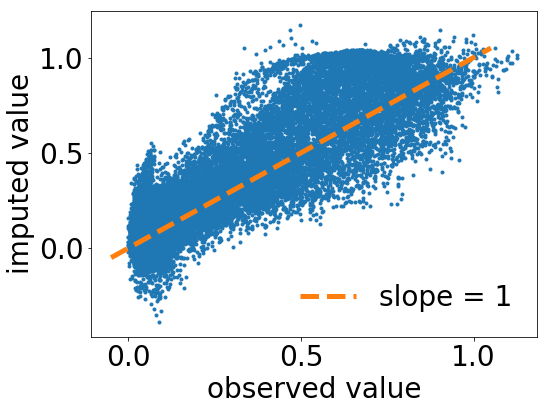

In [25]:
plt.rcParams.update({'font.size': 28})

plt.figure(figsize=(8,6))
plt.plot(np.hstack((np.hstack(save_tr), np.hstack(save_te))), np.hstack((np.hstack(imputed_tr), np.hstack(imputed_te))),'.')
plt.plot([-0.05,1.05],[-0.05,1.05], '--', linewidth=5, label='slope = 1')
plt.xlabel('observed value')
plt.ylabel('imputed value')
plt.legend(frameon=False)
# plt.show()

plt.savefig('validatingimputation.pdf', bbox_inches='tight')

In [11]:
from sklearn.metrics import r2_score
from scipy import stats, linalg

corr=stats.linregress(np.hstack((np.hstack(save_tr), np.hstack(save_te))), np.hstack((np.hstack(imputed_tr), np.hstack(imputed_te))))[-3]
r2=r2_score(np.hstack((np.hstack(save_tr), np.hstack(save_te))), np.hstack((np.hstack(imputed_tr), np.hstack(imputed_te))))

print(corr, r2)

0.9040952392761012 0.7028410561518155
